In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape


(768, 9)

Number of Outcome for each 0 and 1 are:
 0    500
1    268
Name: Outcome, dtype: int64


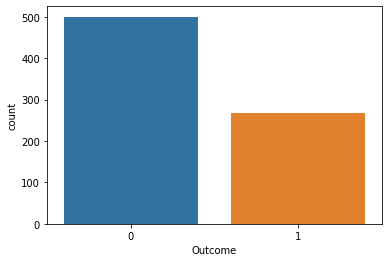

In [ ]:
sns.countplot(x='Outcome', data=df)
print('Number of Outcome for each 0 and 1 are:\n',
      df['Outcome'].value_counts())


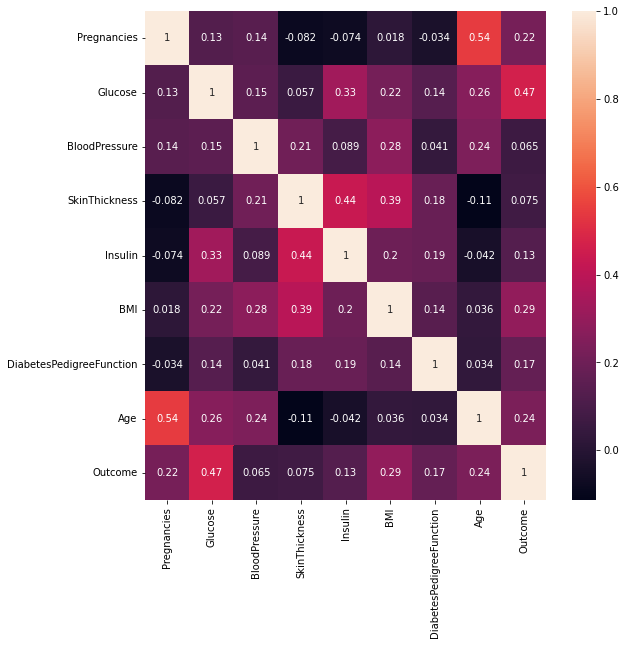

In [ ]:
plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True)

In [ ]:
x = df.drop("Outcome", axis=1)
y = df.Outcome

In [ ]:
x.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
X_test.shape

(154, 8)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=200, batch_size=10)

Epoch 1/200
62/62 [==============================] - 1s 5ms/step - loss: 10.5388 - accuracy: 0.3795 - val_loss: 4.1122 - val_accuracy: 0.4805
Epoch 2/200
62/62 [==============================] - 0s 2ms/step - loss: 1.6621 - accuracy: 0.6254 - val_loss: 1.2150 - val_accuracy: 0.6623
Epoch 3/200
62/62 [==============================] - 0s 2ms/step - loss: 1.0464 - accuracy: 0.6840 - val_loss: 0.9192 - val_accuracy: 0.6688
Epoch 4/200
62/62 [==============================] - 0s 2ms/step - loss: 0.7989 - accuracy: 0.6824 - val_loss: 0.7469 - val_accuracy: 0.7143
Epoch 5/200
62/62 [==============================] - 0s 2ms/step - loss: 0.7237 - accuracy: 0.6726 - val_loss: 0.6975 - val_accuracy: 0.7208
Epoch 6/200
62/62 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.6466 - val_loss: 0.6942 - val_accuracy: 0.7078
Epoch 7/200
62/62 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.6596 - val_loss: 0.6941 - val_accuracy: 0.7078
Epoch 8/200


In [ ]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7329
Training Accuracy: 73.29%

5/5 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7078
Testing Accuracy: 70.78%



In [ ]:
y_test_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
sanaz = np.array([[0, 200, 200, 1, 300, 35, 0.2, 19]])
out1 = model.predict(sanaz)

1/1 [==============================] - 0s 103ms/step


In [ ]:
print(out1)

[[0.00032248]]
